# Smoothing of Images and Edge Detection
                  `The one with Criminal Behind the Gaussian Noise`

                KAPIL KHANAL, DANIEL LEW, NILIMA PANDEY

### Problem Statement
In the parallel universe, Winona Police department came to us for identifying the location of a criminal. The `Criminal was hiding behind the gaussian noise`. 
We took three steps to help the department.<br>
<li>Identifying whether or not it was a gaussian noise
<li>Smooth the photo using different techniques 
<li>Locate the important edges in the photograph.

In [ ]:

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('ggplot')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

* A histogram is a graph or a plot that represents the distribution of the pixel intensities in an image

* focus on the RGB color space

* Calculating the histogram of an image is very useful as it gives an intuition regarding some properties of the image such as the tonal range, the contrast and the brightness

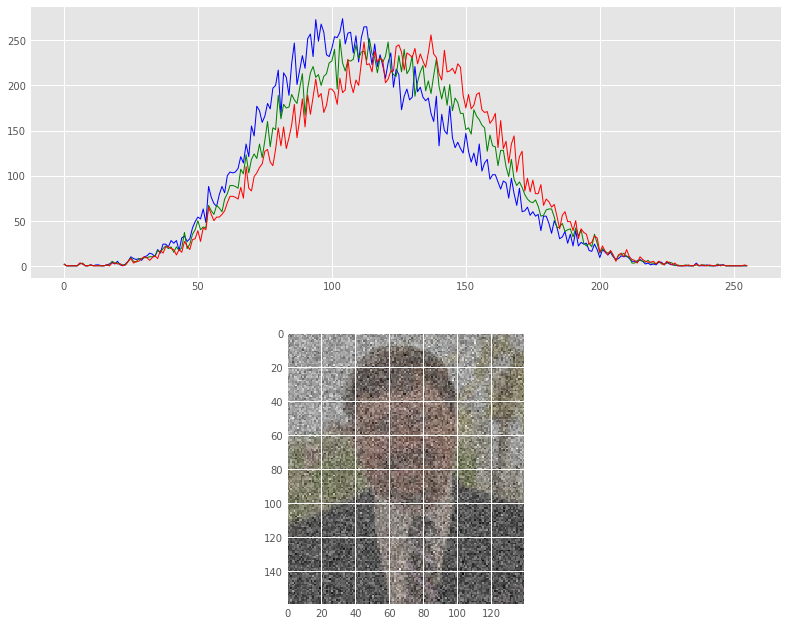

In [252]:
image = cv2.imread("Unidentified.png")

def histogram(image):
    fig,axs = plt.subplots(2,1,figsize = (12,11))
    channels = cv2.split(image)

    colors = ("b", "g", "r") 

    for(channel, c) in zip(channels, colors):
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        axs[0].plot(histogram, color = c,linewidth=1.0)
    axs[1].imshow(image[:,:,::-1])
histogram(image)

    

### Gaussian Blur

We Performed a Gaussian blur on the image. The blur removes some of the noise before further processing the image. A appropriate sigma can be computed from trial and error.


* In Gaussian Blurring, a Gaussian Kernel is used to blur the image.

* cv2.GaussianBlur() function is used to blur the image

* cv2.getGaussianKernel() fcuntion can be used to to create a Gaussian Kernel.

* width and height of the kernel should be specified in the kernel and both of them should be positive and odd

* The standard deviation in X and Y direction, sigmaX and sigmaY should also be specified.

* If only sigmaX is specified, sigmaY is taken same as the sigmaX

* If both sigmaX and sigmaY are given zero, they are calculated from the kernel size

* Gaussian Blurring is higly effective in removing gaussian noise from the image.

### Gaussian Noise

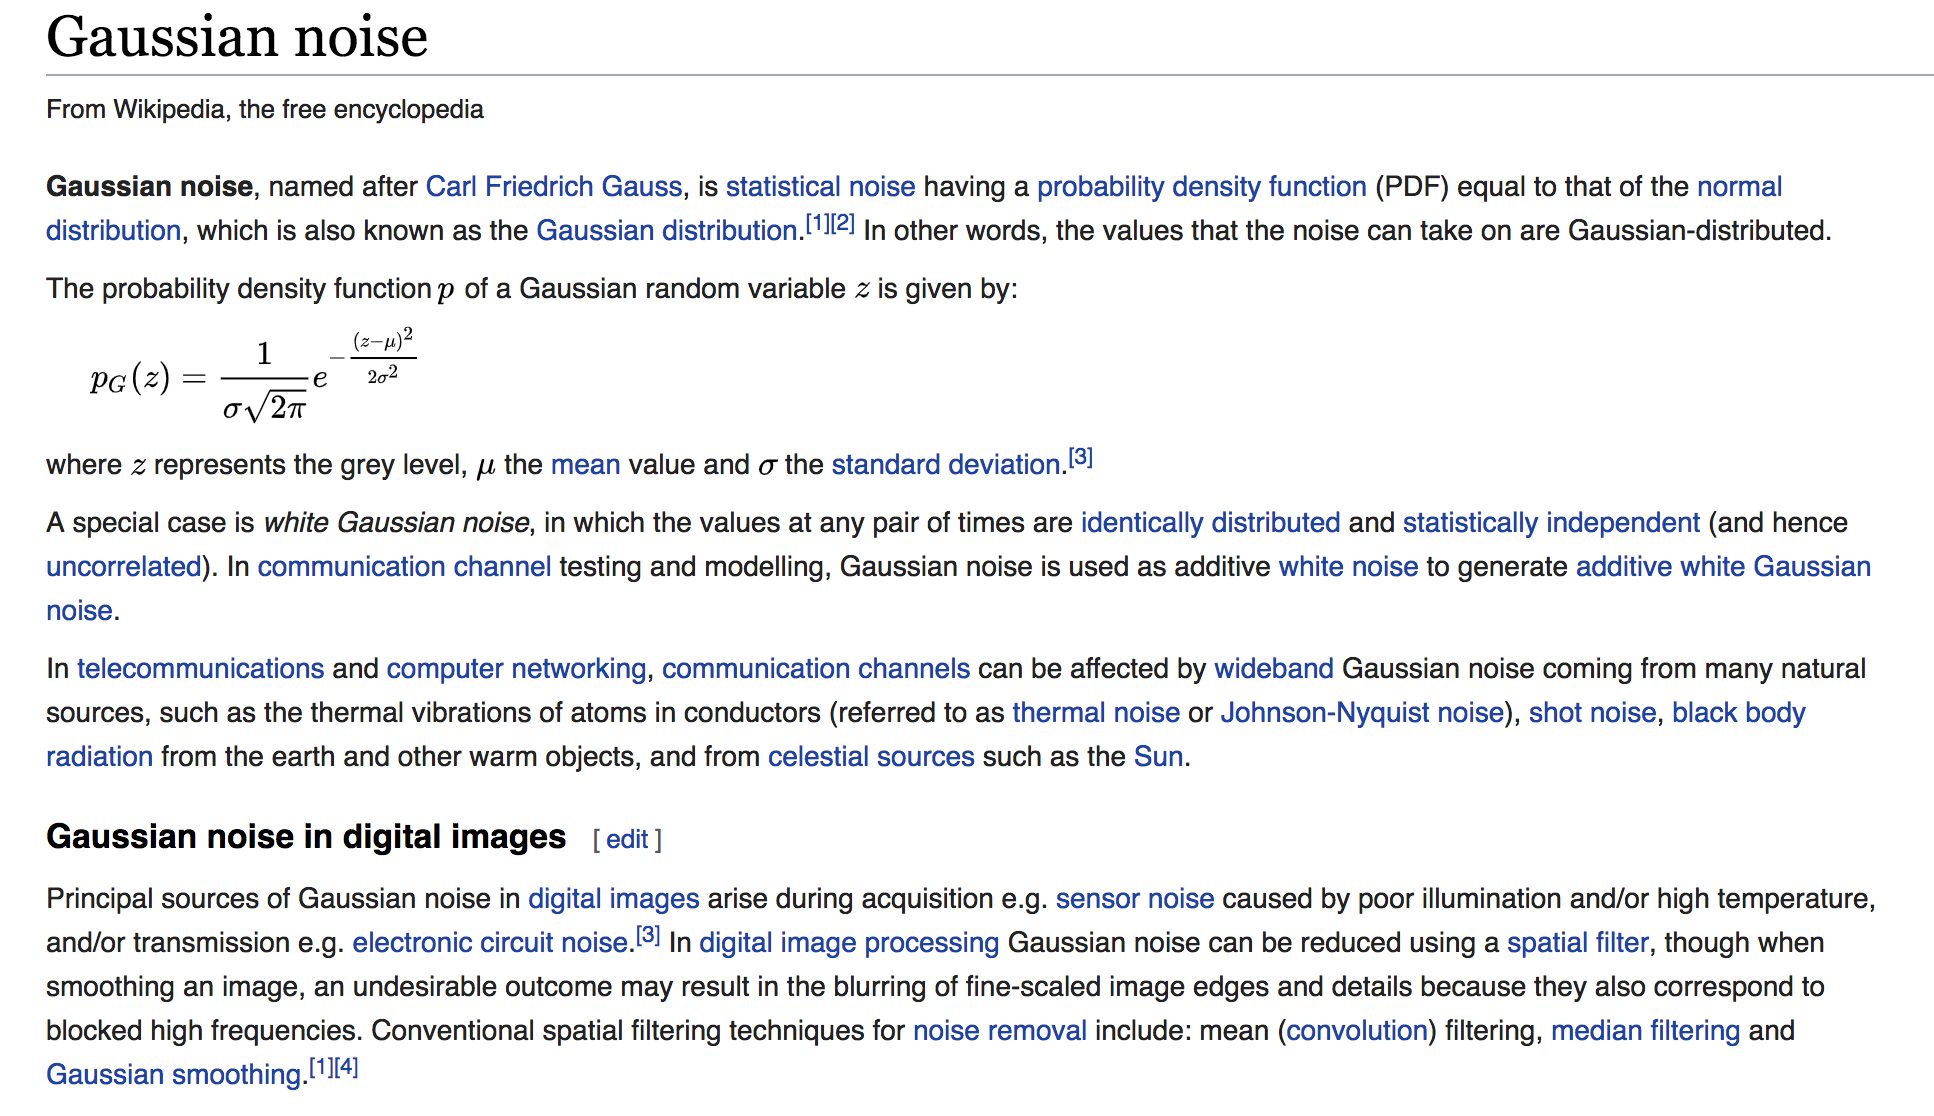

?cv2.GaussianBlur()

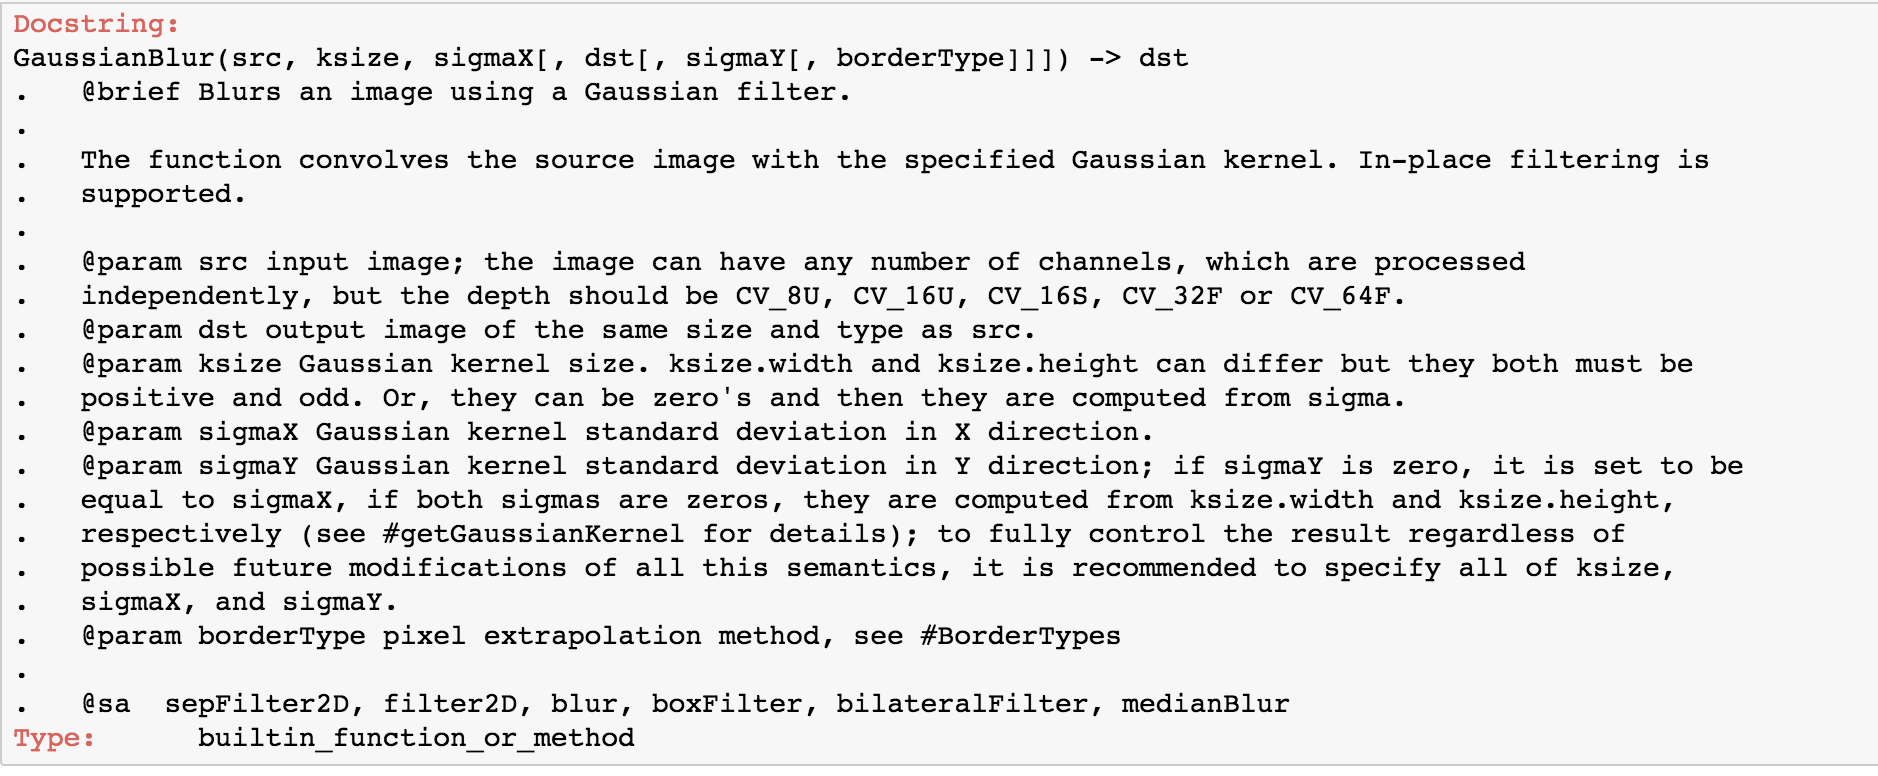

In [251]:
def smoothed_gaussian(img,window_size,sigma,hist = True):
    """ Function called by interact """
    img = cv2.GaussianBlur(img, (window_size, window_size), sigma)
    if hist:
        histogram(img)
    return img
y = interact(smoothed_gaussian,img = fixed(image),window_size = [3,5,7],sigma = widgets.IntSlider(min=0,max=10,step=1,value=4) )


interactive(children=(Dropdown(description='window_size', options=(3, 5, 7), value=3), IntSlider(value=4, desc…

### Median Blur


In [239]:
def smoothed_median(img ,window_size,hist = True):
    """ Function called by interact """
    img = cv2.medianBlur(img, window_size)
    if hist:
        histogram(img)
    return img
y = interact(smoothed_median,img = fixed(image),window_size  = widgets.IntSlider(min=1,max=10,step=2,value=3))


interactive(children=(IntSlider(value=3, description='window_size', max=10, min=1, step=2), Checkbox(value=Tru…

### Convolution
Convolution is an important operation in signal and image processing.
Convolution operateson two signals (in 1D) or two images (in 2D):you can think of one as the “input”
signal (or image), and the other (called the kernel) as a “filter” on the input image, producing
an output image (so convolution takes two images as input and produces a third
as output).


<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/1.JPG" alt="Alt text" title="Title text" />

In [253]:
def smoothed_convolution(img,window_size,hist =True):
    kernel = np.ones((window_size,window_size))/(window_size*window_size)
    img = cv2.filter2D(img, -1,kernel)
    if hist:
        histogram(img)
    return img
y = interact(smoothed_convolution,img = fixed(image),window_size = widgets.IntSlider(min=0,max=10,step=1,value=3))



interactive(children=(IntSlider(value=3, description='window_size', max=10), Checkbox(value=True, description=…

Edge detection is one of the fundamental operations when we perform image processing. It helps us reduce the amount of data (pixels) to process and maintains the structural aspect of the image

In [243]:
def showEdges(img,blur,thresholds, blurType,window_size,sigma):
    """ Function called by interact """
    if blurType == 'Median':
        img = smoothed_median(img,window_size,hist = False)
    elif blurType == 'Guassian':
        img = smoothed_gaussian(img,window_size,sigma,hist = False)
    elif blurType == 'Convolution':
        img = smoothed_convolution(img,window_size,hist = False)
    
    thresh1, thresh2 = thresholds
    edges = cv2.Canny(img, thresh1, thresh2)
    plt.imshow(edges)
    
rangeSlider = widgets.IntRangeSlider(
    value = [50, 200],
    min = 0,
    max = 255,
    step = 1,
    description = 'Thresholds',
    continuous_update = True
)

In [244]:
y = interact(showEdges,
         img = fixed(image),
         blur = True,
         thresholds = rangeSlider,
         blurType = ['Median', 'Guassian', 'Convolution'],
         window_size = [3,5,7,9],
        sigma = widgets.IntSlider(min=0,max=10,step=1,value=4))
        

display(y)

interactive(children=(Checkbox(value=True, description='blur'), IntRangeSlider(value=(50, 200), description='T…

<function __main__.showEdges(img, blur, thresholds, blurType, window_size, sigma)>